In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# AllData = pd.read_csv('./dataFolders/compiledTrackData.csv')
# circ_params = pd.read_csv('./dataFolders/circle_parameters.csv')
# outfig = './dataFolders/Figures/'

In [9]:
Allpath = glob.glob('./dataFolders/Final Tracking xypts/AngleAndRadiusIncluded/' + '*.csv')

In [41]:
handpicked = ['c-1_m13',
              'c-2_m11',
              'c-3_m10',
              'c-10_m11']

In [143]:
for name in handpicked[0:1]:
    path = [data for data in Allpath if (name in data) & ('first' in data)]
    dataExamples = pd.read_csv(path[0])

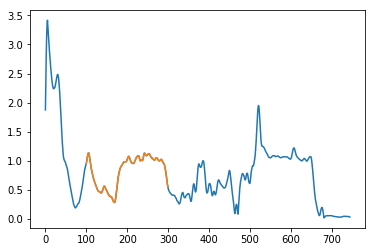

In [162]:
plt.plot(dataExamples.r_gauss)
plt.plot(dataExamples.r_gauss[100:300])

In [145]:
r = dataExamples.r_gauss.values
meanr = np.mean(r)

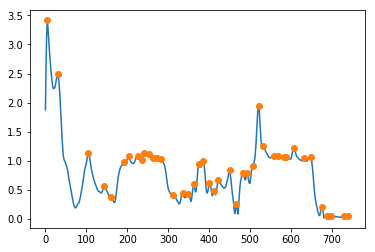

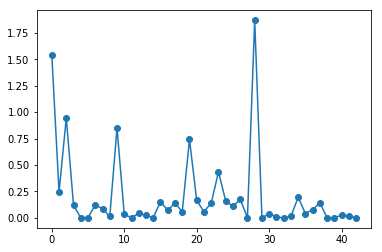

In [146]:
from scipy import signal

ind, _ = signal.find_peaks(r)
prominence, _, _ = signal.peak_prominences(r, ind) 
plt.plot(r)
plt.plot(ind, r[ind], 'o')
plt.show()
plt.plot(prominence, 'o-')

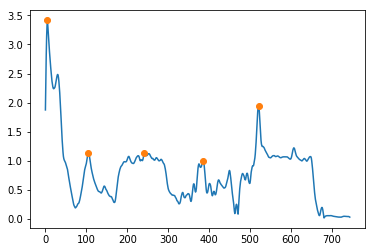

In [147]:
ind, _ = signal.find_peaks(r, prominence=(0.5, ) )
plt.plot(r)
plt.plot(ind, r[ind], 'o')

In [169]:
# use fft to pull out frequency
def returnFFT(array, Fs):
    from scipy.fftpack import fft
    
    meanx = np.mean(array)
    fftr = fft(array - meanx)
        
    Nsamples = len(r) # number of points
    Nf = Nsamples # max Nyquist frequency is Nf/2
    
    TT = 1/Fs # resolution of frequency

    xf = np.linspace(0.0, 1.0/(2.0*TT), round(Nf/(2)))
    
    return(xf, fftr)

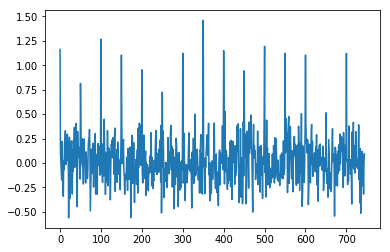

In [180]:
# test with fake data 

test = np.zeros_like(r)
test[0::50]=1

noise = np.random.normal(0,0.2,len(r))
test = test + noise

plt.plot(test)
plt.show()

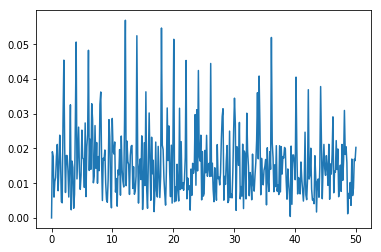

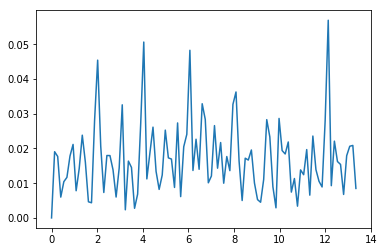

In [193]:
xf, fft_test = returnFFT(test, 100)

plt.plot(xf, 2.0/len(test) * np.abs(fft_test[0:len(test)//2]))
plt.show()   

Nmax = 100  #just looking at the low frequencies (the first 100)
plt.plot(xf[0:Nmax], 2.0/len(test) * np.abs(fft_test[0:Nmax]))
plt.show()

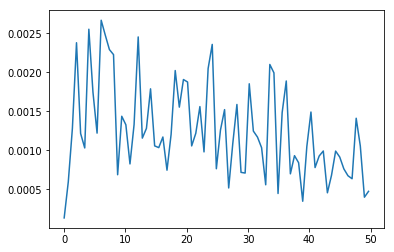

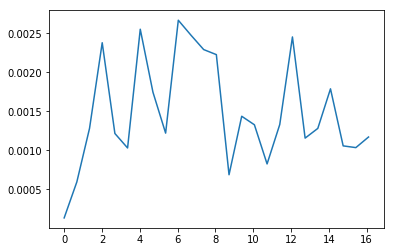

In [201]:
# testing the Welch method
f, Pxx = signal.welch(x= test, 
                      fs=100.0, 
                      window='hanning',
                      nperseg = round(len(test)/5),
                      return_onesided=True, scaling='density')
plt.plot(f, Pxx)
plt.show()

plt.plot(f[:25], Pxx[:25])
plt.show()

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


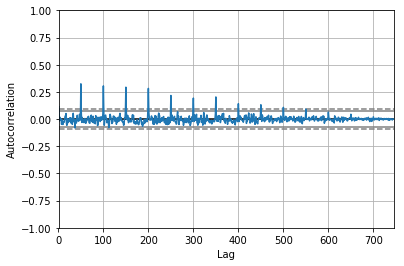

In [183]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(test)

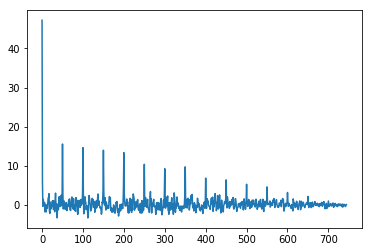

In [186]:
autocor_test = signal.correlate(test, test, mode='full')
plt.plot(autocor_test[round(len(autocor_test)/2):])

In [3]:
p1 = pd.Series(data = None, index = AllData.index, name = 'angle', dtype = 'float64')
AllData = pd.concat([AllData, p1], axis = 1)
AllData.head()

,Unnamed: 0,name,trial,xpts,ypts,radius,theta,angle
0,0,c-1_m13,0,NaN,NaN,NaN,NaN,NaN
1,1,c-1_m13,0,5.011057,348.049824,321.678510,160.373100,NaN
2,2,c-1_m13,0,20.932432,335.463658,302.524542,161.605573,NaN
3,3,c-1_m13,0,40.568796,325.165885,280.664705,162.335453,NaN
4,4,c-1_m13,0,50.652334,323.449590,270.539563,162.033785,NaN


In [6]:
names = AllData.name.unique()
names

array(['c-1_m13', 'c-2_m5', 'c-3_m10', 'c-10_m11', 'c-1_m2', 'c-1_m6',
       'c-2_m1', 'c-2_m11', 'c-3_m1', 'c-3_m6', 'c-10_m3', 'c-10_m6'],
      dtype=object)

In [91]:
for name in names[2:3]: 
    circ_x = circ_params.circ_x[circ_params.name == name].values
    circ_y = circ_params.circ_y[circ_params.name == name].values
    circ_r = circ_params.circ_radii[circ_params.name == name].values

    trial = ['0', 'last']
    for trial in trial[0]:
        x = AllData[(AllData.name == name) & (AllData.trial == trial)].xpts.values
        y = AllData[(AllData.name == name) & (AllData.trial == trial)].ypts.values
        
        # center the x and y coordinates
        cent_x = x - circ_x
        cent_y = y - circ_y
        r = np.linalg.norm([cent_x, cent_y], axis = 0)
        r = r/circ_r

Text(0.5,1,'c-3_m10')

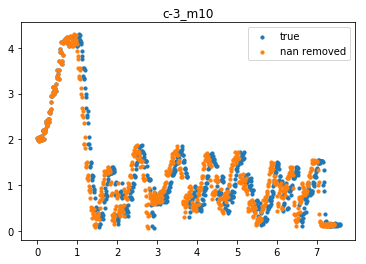

In [92]:
t = np.arange(len(r))*1/100
plt.scatter(t, r, s = 10, label = 'true')

r_dropnan = r[~np.isnan(r)]
t_dropnan = np.arange(len(r_dropnan))*1/100
plt.scatter(t_dropnan, r_dropnan, s = 10, label = 'nan removed')

plt.legend()
plt.title(name)